In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import Normalizer

# import sklearn libraries for MLP, random forest, decision tree, and logistic regression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [14]:
os.chdir('/Users/alisdghnia/Desktop/Research Datasets/')
# df_1 = pd.read_csv('dict_regression_pvalue.csv')
df_1 = pd.read_csv('top_53_terms.csv')

In [15]:
term_list = df_1.Term.tolist()

In [41]:
tf_idf = pd.read_csv('technical_terms_tfidf_without_btc&eth.csv')

In [42]:
# make Unnamed: 0 the index
tf_idf.set_index('Unnamed: 0', inplace=True)

In [43]:
# Only keep columns in tf_idf that are in term_list
tf_idf = tf_idf[term_list]
tf_idf

,turing,burn,mwallet,segregated,fault,roi,financial,presale,secret,currencies,...,vesting,scam,iaas,reward,directive,money,agreement,private,function,sales
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
bitbase - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000181,0.0,0.000000,0.0,0.000091,0.000091,0.000000,0.000091,0.000000
neural protocol - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000615,0.000000,0.000307,0.000922,0.000000
idena - whitepaper,0.000059,0.000059,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000118,...,0.000000,0.000000,0.0,0.001412,0.0,0.000000,0.000000,0.000177,0.000000,0.000000
livestars - whitepaper,0.000000,0.000064,0.0,0.0,0.000000,0.000000,0.000000,0.000096,0.000000,0.000223,...,0.000000,0.000000,0.0,0.000032,0.0,0.000351,0.000032,0.000255,0.000128,0.000000
ferret token - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bitcoen - whitepaper,0.000052,0.000000,0.0,0.0,0.000052,0.000026,0.000103,0.000000,0.000026,0.000155,...,0.000000,0.000000,0.0,0.000026,0.0,0.000103,0.000077,0.000180,0.000129,0.000077
marginless - whitepaper,0.000043,0.000000,0.0,0.0,0.000000,0.000021,0.000191,0.000021,0.000021,0.000149,...,0.000000,0.000000,0.0,0.000255,0.0,0.000149,0.000021,0.000021,0.000128,0.000000
cryptonex - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000094,0.000000,0.000000,0.000000,0.000690,...,0.000000,0.000063,0.0,0.000314,0.0,0.000125,0.000063,0.000000,0.000000,0.000031


In [44]:
# drop rows that have null values in them
tf_idf = tf_idf.dropna()
tf_idf

,turing,burn,mwallet,segregated,fault,roi,financial,presale,secret,currencies,...,vesting,scam,iaas,reward,directive,money,agreement,private,function,sales
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
bitbase - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000181,0.0,0.000000,0.0,0.000091,0.000091,0.000000,0.000091,0.000000
neural protocol - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000615,0.000000,0.000307,0.000922,0.000000
idena - whitepaper,0.000059,0.000059,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000118,...,0.000000,0.000000,0.0,0.001412,0.0,0.000000,0.000000,0.000177,0.000000,0.000000
livestars - whitepaper,0.000000,0.000064,0.0,0.0,0.000000,0.000000,0.000000,0.000096,0.000000,0.000223,...,0.000000,0.000000,0.0,0.000032,0.0,0.000351,0.000032,0.000255,0.000128,0.000000
ferret token - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bitcoen - whitepaper,0.000052,0.000000,0.0,0.0,0.000052,0.000026,0.000103,0.000000,0.000026,0.000155,...,0.000000,0.000000,0.0,0.000026,0.0,0.000103,0.000077,0.000180,0.000129,0.000077
marginless - whitepaper,0.000043,0.000000,0.0,0.0,0.000000,0.000021,0.000191,0.000021,0.000021,0.000149,...,0.000000,0.000000,0.0,0.000255,0.0,0.000149,0.000021,0.000021,0.000128,0.000000
cryptonex - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000094,0.000000,0.000000,0.000000,0.000690,...,0.000000,0.000063,0.0,0.000314,0.0,0.000125,0.000063,0.000000,0.000000,0.000031


In [45]:
# normalize the tfidf values using normalizer from sklearn and replace the values in tf_idf and keep the index
tf_idf = pd.DataFrame(Normalizer().fit_transform(tf_idf), index=tf_idf.index, columns=tf_idf.columns)
tf_idf

,turing,burn,mwallet,segregated,fault,roi,financial,presale,secret,currencies,...,vesting,scam,iaas,reward,directive,money,agreement,private,function,sales
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
bitbase - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.384900,0.0,0.000000,0.0,0.192450,0.192450,0.000000,0.192450,0.000000
neural protocol - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.304997,0.000000,0.152499,0.457496,0.000000
idena - whitepaper,0.015206,0.015206,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.030411,...,0.000000,0.000000,0.0,0.364937,0.0,0.000000,0.000000,0.045617,0.000000,0.000000
livestars - whitepaper,0.000000,0.059209,0.0,0.0,0.000000,0.000000,0.000000,0.088813,0.000000,0.207231,...,0.000000,0.000000,0.0,0.029604,0.0,0.325649,0.029604,0.236836,0.118418,0.000000
ferret token - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bitcoen - whitepaper,0.051917,0.000000,0.0,0.0,0.051917,0.025959,0.103835,0.000000,0.025959,0.155752,...,0.000000,0.000000,0.0,0.025959,0.0,0.103835,0.077876,0.181711,0.129794,0.077876
marginless - whitepaper,0.054034,0.000000,0.0,0.0,0.000000,0.027017,0.243154,0.027017,0.027017,0.189120,...,0.000000,0.000000,0.0,0.324206,0.0,0.189120,0.027017,0.027017,0.162103,0.000000
cryptonex - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.097849,0.000000,0.000000,0.000000,0.717561,...,0.000000,0.065233,0.0,0.326164,0.0,0.130466,0.065233,0.000000,0.000000,0.032616


In [55]:
tf_idf

,turing,burn,mwallet,segregated,fault,roi,financial,presale,secret,currencies,...,vesting,scam,iaas,reward,directive,money,agreement,private,function,sales
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
bitbase - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.384900,0.0,0.000000,0.0,0.192450,0.192450,0.000000,0.192450,0.000000
neural protocol - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.304997,0.000000,0.152499,0.457496,0.000000
idena - whitepaper,0.015206,0.015206,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.030411,...,0.000000,0.000000,0.0,0.364937,0.0,0.000000,0.000000,0.045617,0.000000,0.000000
livestars - whitepaper,0.000000,0.059209,0.0,0.0,0.000000,0.000000,0.000000,0.088813,0.000000,0.207231,...,0.000000,0.000000,0.0,0.029604,0.0,0.325649,0.029604,0.236836,0.118418,0.000000
ferret token - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bitcoen - whitepaper,0.051917,0.000000,0.0,0.0,0.051917,0.025959,0.103835,0.000000,0.025959,0.155752,...,0.000000,0.000000,0.0,0.025959,0.0,0.103835,0.077876,0.181711,0.129794,0.077876
marginless - whitepaper,0.054034,0.000000,0.0,0.0,0.000000,0.027017,0.243154,0.027017,0.027017,0.189120,...,0.000000,0.000000,0.0,0.324206,0.0,0.189120,0.027017,0.027017,0.162103,0.000000
cryptonex - whitepaper,0.000000,0.000000,0.0,0.0,0.000000,0.097849,0.000000,0.000000,0.000000,0.717561,...,0.000000,0.065233,0.0,0.326164,0.0,0.130466,0.065233,0.000000,0.000000,0.032616


In [59]:
success = pd.read_csv('Coin-Price-Match 0-1838 - ALL.csv')
success.drop(columns= 'Unnamed: 0', inplace=True)
success.coin_whitepaper_name = success.coin_whitepaper_name.apply(lambda x: x.replace('.pdf', ''))
success_copy = success.copy()

def ConvertInt(x):
    try:
        if type(x) == str:
            x = x.replace('$','')
            x = x.replace(',','')
            x = x.replace('Nan', '0')
            x = x.replace("- -", '0')
            x = x.strip()
            x = float(x)
    except Exception:
        x = 0

    return x

success_copy.market_cap = success_copy.market_cap.apply(lambda x: ConvertInt(x))
success_copy.market_cap.fillna(value=0, inplace=True)
success_copy.market_cap = pd.to_numeric(success_copy.market_cap)

success_copy.coin_price = success_copy.coin_price.apply(lambda x: ConvertInt(x))
success_copy.coin_price.fillna(value=0, inplace=True)
success_copy.coin_price = pd.to_numeric(success_copy.coin_price)

success_copy.volume = success_copy.volume.apply(lambda x: ConvertInt(x))
success_copy.volume.fillna(value=0, inplace=True)
success_copy.volume = pd.to_numeric(success_copy.volume)



df1 = pd.read_csv('Metadata 1838 Whitepapers.csv')
df1.Name = df1.Name.apply(lambda x: x.replace('.pdf', ''))
# lower case the Names column
df1.Name = df1.Name.apply(lambda x: x.lower())

meta_tfidf = pd.merge(df1, tf_idf, left_on='Name', right_index=True)

meta_tfidf = meta_tfidf[meta_tfidf['Flesch Reading Ease'] > 0]
meta_tfidf = meta_tfidf[meta_tfidf['Flesch Reading Ease'] < 100]
meta_tfidf = meta_tfidf[meta_tfidf['New Dale-Chall'] > 0]
meta_tfidf = meta_tfidf[meta_tfidf['New Dale-Chall'] < 10]

meta_tfidf.reset_index(inplace=True)

In [61]:
meta_tfidf.columns[:20]

Index(['index', 'Unnamed: 0', 'Name', 'File Size (MB)', 'Number of Pages',
       'Word Count', 'Flesch Reading Ease', 'New Dale-Chall',
       'Abstract Section', 'Summary Section', 'Reference Section', 'turing',
       'burn', 'mwallet', 'segregated', 'fault', 'roi', 'financial', 'presale',
       'secret'],
      dtype='object')

In [66]:
meta_tfidf = meta_tfidf.drop(columns=['index', 'Unnamed: 0', 'File Size (MB)', 'Number of Pages', 'Word Count', 'Flesch Reading Ease',
                                        'New Dale-Chall', 'Abstract Section',
                                        'Summary Section', 'Reference Section'])
success_copy = success_copy.drop(columns=['coin_name_on_web', 'coin_symbol', 'max_supply', 'total_supply', 'fully_diluted_market_cap'])

,coin_whitepaper_name,coin_price,market_cap,volume
0,0chain - Whitepaper,0.18,8702623.0,90347.0
1,0x - Whitepaper,0.17,147120661.0,21811197.0
2,0xbitcoin - Whitepaper,0.15,1492573.0,73508.0
3,0xcert - Whitepaper,0.00,0.0,0.0
4,12Ships - Whitepaper,0.00,270816.0,24352.0
...,...,...,...,...
1833,ZMINE - Whitepaper,0.00,948804.0,0.0
1834,Zoin - Whitepaper,0.04,0.0,0.0
1835,ZPER - Whitepaper,0.00,15691.0,0.0
1836,ZrCoin - Whitepaper,0.00,0.0,0.0


In [69]:
success_copy['coin_whitepaper_name'] = success_copy['coin_whitepaper_name'].apply(lambda x: x.lower())

all_df = pd.merge(success_copy, meta_tfidf, left_on = 'coin_whitepaper_name', right_on = 'Name')
all_df = all_df.drop(columns='Name')

In [70]:
all_df

,coin_whitepaper_name,coin_price,market_cap,volume,turing,burn,mwallet,segregated,fault,roi,...,vesting,scam,iaas,reward,directive,money,agreement,private,function,sales
0,0chain - whitepaper,0.18,8702623.0,90347.0,0.000000,0.000000,0.0,0.0,0.061770,0.041180,...,0.010295,0.000000,0.0,0.617704,0.0,0.020590,0.010295,0.133836,0.010295,0.000000
1,0x - whitepaper,0.17,147120661.0,21811197.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.030359,0.000000,0.121435,0.425024,0.000000
2,0xcert - whitepaper,0.00,0.0,0.0,0.026064,0.104257,0.0,0.0,0.052129,0.000000,...,0.000000,0.026064,0.0,0.156386,0.0,0.000000,0.000000,0.182450,0.338836,0.078193
3,1inch - whitepaper,0.50,304470524.0,17445198.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.041380,0.0,0.000000,0.000000,0.000000,0.082761,0.000000
4,1irstcoin - whitepaper,0.19,9123589.0,12756.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.104257,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,zmine - whitepaper,0.00,948804.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.094491,...,0.000000,0.000000,0.0,0.661438,0.0,0.094491,0.000000,0.094491,0.094491,0.000000
1670,zoin - whitepaper,0.04,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.094491,...,0.000000,0.000000,0.0,0.661438,0.0,0.094491,0.000000,0.094491,0.094491,0.000000
1671,zper - whitepaper,0.00,15691.0,0.0,0.628950,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.021688,0.021688,0.021688,0.000000,0.021688
1672,zrcoin - whitepaper,0.00,0.0,0.0,0.628950,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.021688,0.021688,0.021688,0.000000,0.021688


# Median for Market Cap

In [71]:
# Median Value for Market Cap
median_market_cap = all_df.market_cap.median()

# binary values for market cap based on median
all_df['market_cap_binary'] = all_df['market_cap'].apply(lambda x: 1 if x > median_market_cap else 0)

In [72]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_df[term_list], all_df['market_cap_binary'], test_size=0.2)

Accuracy:  0.5582089552238806
Confusion Matrix:  [[98 61]
 [87 89]]
Classification Report:                precision    recall  f1-score   support

           0       0.53      0.62      0.57       159
           1       0.59      0.51      0.55       176

    accuracy                           0.56       335
   macro avg       0.56      0.56      0.56       335
weighted avg       0.56      0.56      0.56       335

AUC: 0.561
Precision Score: 0.593
Accuracy: 0.58 (+/- 0.04)
Precision Score: 0.59 (+/- 0.07)
Accuracy: 0.59 (+/- 0.01)
Precision Score: 0.60 (+/- 0.02)


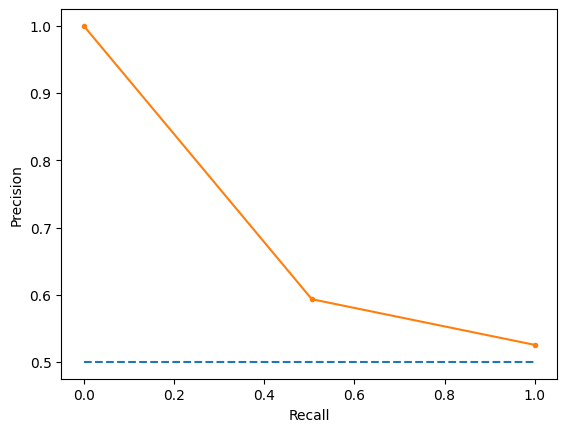

In [76]:
# same process for random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# calculate the standard deviation of the accuracy and precision scores
accuracy_1 = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
precision_1 = cross_val_score(rf, X_train, y_train, cv=5, scoring='precision')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_1.mean(), accuracy_1.std() * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (precision_1.mean(), precision_1.std() * 2))

# run the cross validation (5-fold) for the random forest model 100 times and store the results in a list and then calculate the mean and standard deviation
accuracy_2 = []
precision_2 = []
for i in range(10):
    accuracy_2.append(cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean())
    precision_2.append(cross_val_score(rf, X_train, y_train, cv=5, scoring='precision').mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(accuracy_2), np.std(accuracy_2) * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (np.mean(precision_2), np.std(precision_2) * 2))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Accuracy:  0.5044776119402985
Confusion Matrix:  [[77 82]
 [84 92]]
Classification Report:                precision    recall  f1-score   support

           0       0.48      0.48      0.48       159
           1       0.53      0.52      0.53       176

    accuracy                           0.50       335
   macro avg       0.50      0.50      0.50       335
weighted avg       0.50      0.50      0.50       335

AUC: 0.504
Precision Score: 0.529
Accuracy: 0.57 (+/- 0.08)
Precision Score: 0.57 (+/- 0.10)
Accuracy: 0.57 (+/- 0.01)
Precision Score: 0.58 (+/- 0.01)


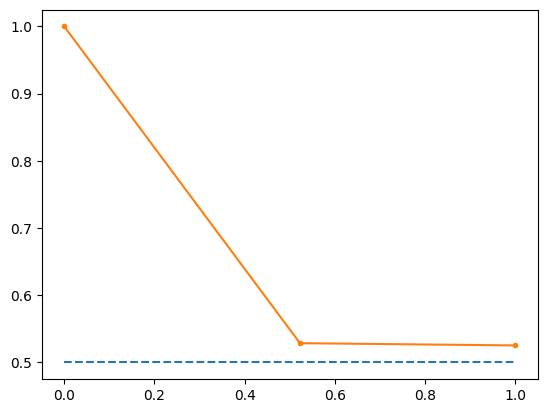

In [75]:
# same process for Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# calculate the standard deviation of the accuracy and precision scores
accuracy_1 = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
precision_1 = cross_val_score(dt, X_train, y_train, cv=10, scoring='precision')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_1.mean(), accuracy_1.std() * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (precision_1.mean(), precision_1.std() * 2))

accuracy_2 = []
precision_2 = []
for i in range(10):
    accuracy_2.append(cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy').mean())
    precision_2.append(cross_val_score(dt, X_train, y_train, cv=5, scoring='precision').mean())
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(accuracy_2), np.std(accuracy_2) * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (np.mean(precision_2), np.std(precision_2) * 2))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# same process for logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
# use MLP to predict market cap
mlp = MLPClassifier(hidden_layer_sizes=(10,10,), max_iter=1000)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

# print out important metrics
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions))
print("Classification Report: ", classification_report(y_test, predictions))

# print out ROC curve, AUC, Precision Score, and Precision-Recall Curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
print('Precision Score: %.3f' % precision_score(y_test, predictions))
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

# calculate the standard deviation of the accuracy and precision scores
accuracy_1 = cross_val_score(mlp, X_train, y_train, cv=10, scoring='accuracy')
precision_1 = cross_val_score(mlp, X_train, y_train, cv=10, scoring='precision')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy_1.mean(), accuracy_1.std() * 2))
print("Precision Score: %0.2f (+/- %0.2f)" % (precision_1.mean(), precision_1.std() * 2))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()